In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import serapi as s

ModuleNotFoundError: No module named 'serapi'

In [2]:
!pip install serpapi

In [3]:
api_key = '299ca6940fb3d8a3c7fd3f47dc1ca3ead026258930d1d9457a3cc6c8b9d75a4e'

In [4]:
import serpapi

In [6]:
client = serpapi.Client(api_key = api_key)

In [11]:
results = client.search(
        engine = 'google_play_product',
        product_id = 'in.ndhm.phr',
        store = 'apps',
        all_reviews = 'true',
        num = 199,
)

In [12]:
len(results['reviews'])

199

In [13]:
ans = results['reviews']
while 'serpapi_pagination' in results:
    results = client.search(
        engine = 'google_play_product',
        product_id = 'in.ndhm.phr',
        store = 'apps',
        all_reviews = 'true',
        num = 199,
        next_page_token = results['serpapi_pagination']['next_page_token']
    )
    
    ans += results['reviews']
    
    print(len(results['reviews']))

    
print(len(ans))

199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
199
18
3401


In [35]:
ans[0]

{'id': 'abe883f7-4aa9-42f0-abb3-1ee9c5632005',
 'title': 'Chiranjib Bordoloi',
 'avatar': 'https://play-lh.googleusercontent.com/a/ACg8ocLhLWOxvABy0COnW49uyVXMtn-qWNFkAR7zOoRK1l3GCEwgDwVD=mo',
 'rating': 1.0,
 'snippet': "What a waste app, not able to enter district name and state name while during emergency and hospital authority only register through abha app so please improve or else close it for now. It's frustrating for family members to register during emergency if app doesn't work properly. Don't let interns make such an important app hire some professionals. Disappointed.",
 'likes': 8,
 'date': 'May 21, 2024',
 'iso_date': '2024-05-21T10:22:17Z'}

In [36]:
names = [x['title'] for x in ans]


In [37]:
ratings = [x['rating'] for x in ans]

comments = [x['snippet'] for x in ans]
dates = [x['date'] for x in ans]

In [38]:
reviews = pd.DataFrame({'name':names, 'comment':comments, 'date':dates, 'rating':ratings})

In [39]:
reviews

,name,comment,date,rating
0,Chiranjib Bordoloi,"What a waste app, not able to enter district n...","May 21, 2024",1.0
1,Prem Tank,That is resolved but another issue occuring is...,"May 03, 2024",2.0
2,Raj Kumari,App is good. I opened it for the first time an...,"April 12, 2024",2.0
3,Prajakta Naik,I've already created my abha card but now my a...,"May 23, 2024",1.0
4,Rishabh Kulshrestha,"Useless App, too many bugs. Unreliable, manage...","May 27, 2024",1.0
...,...,...,...,...
3396,Pardhi Kamlesh Bhai Laxman Bhai,Wow woderfull,"November 28, 2022",5.0
3397,Arif Electrician,MD Arif,"October 10, 2021",5.0
3398,Pooja shakya,Pooja saini,"June 06, 2022",5.0
3399,Radheshyam Meenar,Radheshyaam Meena,"December 24, 2023",5.0


In [40]:
reviews['date'] = pd.to_datetime(reviews['date'])
reviews

,name,comment,date,rating
0,Chiranjib Bordoloi,"What a waste app, not able to enter district n...",2024-05-21,1.0
1,Prem Tank,That is resolved but another issue occuring is...,2024-05-03,2.0
2,Raj Kumari,App is good. I opened it for the first time an...,2024-04-12,2.0
3,Prajakta Naik,I've already created my abha card but now my a...,2024-05-23,1.0
4,Rishabh Kulshrestha,"Useless App, too many bugs. Unreliable, manage...",2024-05-27,1.0
...,...,...,...,...
3396,Pardhi Kamlesh Bhai Laxman Bhai,Wow woderfull,2022-11-28,5.0
3397,Arif Electrician,MD Arif,2021-10-10,5.0
3398,Pooja shakya,Pooja saini,2022-06-06,5.0
3399,Radheshyam Meenar,Radheshyaam Meena,2023-12-24,5.0


In [41]:
reviews = reviews.sort_values(by = 'date', ascending = False)
reviews

,name,comment,date,rating
1928,SENTHIL SENTHIL,good app thanks,2024-06-07,5.0
1925,sachin pimpalkar,Biomatric ka option dena chahiye Face ke bahut...,2024-06-07,1.0
323,Shailendra Kumar,Very good app,2024-06-06,5.0
179,Just Fun,Website option aur aap option very deference..,2024-06-06,3.0
23,Gourav Kumar,Third class app. Not opening. Only ads loading...,2024-06-06,1.0
...,...,...,...,...
740,MANISH KUMAR,"Nice app for save our helth record,By this app...",2021-05-06,5.0
1509,Ym tech Narmadhakumar (Narmath),Didint find records already registered,2021-02-25,1.0
1252,Chirag Kumar Sahu,Nice app to get to go digital health I'd,2021-01-30,5.0
1856,Mukesh chouhan,Modi digital Bharat 🙏,2021-01-23,5.0


In [42]:
reviews = reviews.set_index('date')

In [97]:
reviews = reviews.iloc[:3400]


In [98]:
reviews.to_csv('reviews.csv', index = True)

In [99]:
data = pd.read_csv('reviews.csv')


In [100]:
data['date']= pd.to_datetime(data['date'])
data

,date,name,comment,rating
0,2024-06-07,SENTHIL SENTHIL,good app thanks,5.0
1,2024-06-07,sachin pimpalkar,Biomatric ka option dena chahiye Face ke bahut...,1.0
2,2024-06-06,Shailendra Kumar,Very good app,5.0
3,2024-06-06,Just Fun,Website option aur aap option very deference..,3.0
4,2024-06-06,Gourav Kumar,Third class app. Not opening. Only ads loading...,1.0
...,...,...,...,...
3395,2021-05-07,Augmento Consultancy Services,"Don't disclose, it works only for limited states",1.0
3396,2021-05-06,MANISH KUMAR,"Nice app for save our helth record,By this app...",5.0
3397,2021-02-25,Ym tech Narmadhakumar (Narmath),Didint find records already registered,1.0
3398,2021-01-30,Chirag Kumar Sahu,Nice app to get to go digital health I'd,5.0


In [101]:
data.set_index('date', inplace = True)

In [102]:
data

,name,comment,rating
date,,,
2024-06-07,SENTHIL SENTHIL,good app thanks,5.0
2024-06-07,sachin pimpalkar,Biomatric ka option dena chahiye Face ke bahut...,1.0
2024-06-06,Shailendra Kumar,Very good app,5.0
2024-06-06,Just Fun,Website option aur aap option very deference..,3.0
2024-06-06,Gourav Kumar,Third class app. Not opening. Only ads loading...,1.0
...,...,...,...
2021-05-07,Augmento Consultancy Services,"Don't disclose, it works only for limited states",1.0
2021-05-06,MANISH KUMAR,"Nice app for save our helth record,By this app...",5.0
2021-02-25,Ym tech Narmadhakumar (Narmath),Didint find records already registered,1.0


# average_review per year chart

In [103]:
avg_rates = [round(data.loc['2024'].rating.mean(),2),
round(data.loc['2023'].rating.mean(),2),
round(data.loc['2022'].rating.mean(),2),
round(data.loc['2021'].rating.mean(),2),]

avg_rates

[3.06, 3.01, 2.73, 2.51]

In [104]:
avg_rating_series = pd.Series(index = ['2024', '2023', '2022', '2021'], data = avg_rates)
avg_rating_series.sort_index(inplace = True)

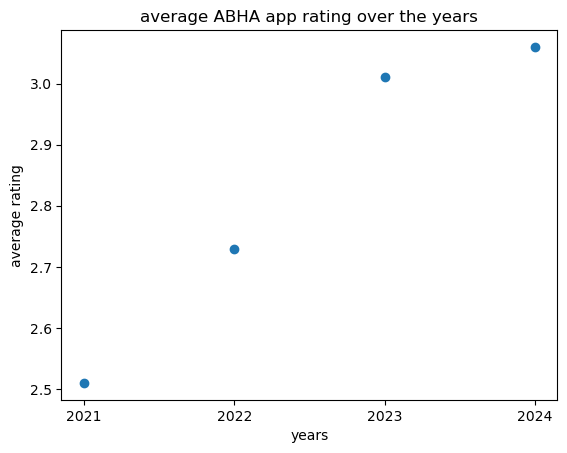

In [105]:
plt.scatter(x = avg_rating_series.index, y = avg_rating_series.values)
plt.title('average ABHA app rating over the years')
plt.xlabel('years')
plt.ylabel('average rating')
None

# OTP issues year on year

In [106]:
data.comment = data.comment.str.lower()

In [107]:
data

,name,comment,rating
date,,,
2024-06-07,SENTHIL SENTHIL,good app thanks,5.0
2024-06-07,sachin pimpalkar,biomatric ka option dena chahiye face ke bahut...,1.0
2024-06-06,Shailendra Kumar,very good app,5.0
2024-06-06,Just Fun,website option aur aap option very deference..,3.0
2024-06-06,Gourav Kumar,third class app. not opening. only ads loading...,1.0
...,...,...,...
2021-05-07,Augmento Consultancy Services,"don't disclose, it works only for limited states",1.0
2021-05-06,MANISH KUMAR,"nice app for save our helth record,by this app...",5.0
2021-02-25,Ym tech Narmadhakumar (Narmath),didint find records already registered,1.0


In [109]:
years = ['2021', '2022', '2023', '2024']

otp_dict = {year : data.loc[year].comment.str.contains('otp').sum() for year in years}
# data.loc['2020'].comment.str.contains('otp').sum()

otp_dict

{'2021': 16, '2022': 28, '2023': 34, '2024': 5}

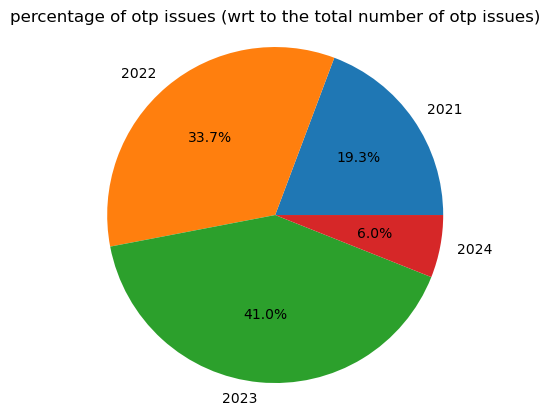

In [128]:
plt.pie( pd.Series(otp_dict).values,labels = pd.Series(otp_dict).index, autopct = '%1.1f%%')
plt.axis('equal')
plt.title('percentage of otp issues (wrt to the total number of otp issues)')

None